In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading cleaned data 

offense_data = {}
offence_amount =[]
years = [2008, 2009, 2010, 2011, 2012, 2013, 2014]
for year in years:
    print (f"Reading data for the year: {year}")
    offense_data[year] = pd.read_csv("../data/cleaned_data/louisa_stations_" + str(year) + ".csv")
    offence_amount.append(offense_data[year].index[-1])

Reading data for the year: 2008
Reading data for the year: 2009
Reading data for the year: 2010
Reading data for the year: 2011
Reading data for the year: 2012
Reading data for the year: 2013
Reading data for the year: 2014


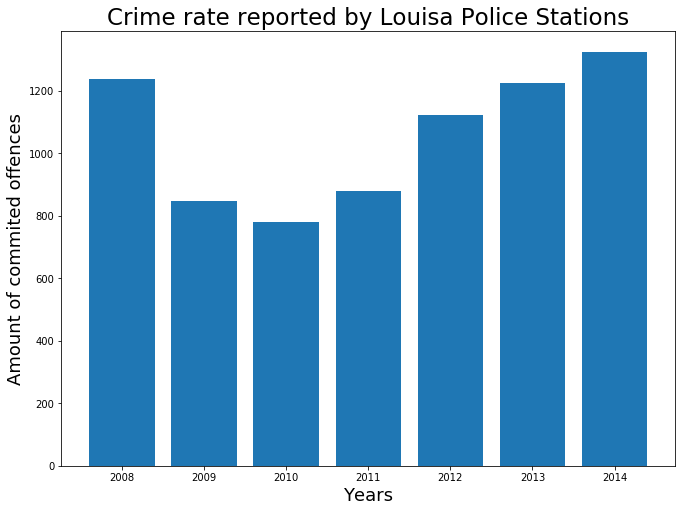

In [3]:
# creating bar chart for each year and reviewing data

plt.figure(figsize=(11,8))
plt.bar(years, offence_amount)
plt.xlabel ("Years", fontsize=18)
plt.ylabel ("Amount of commited offences", fontsize=18)
plt.title ("Crime rate reported by Louisa Police Stations",  fontsize=23)
plt.savefig ("../data/cleaned_data/Louisa_crime_yearly.png")


In [4]:
# Adding new column which will hold only month of the incident
# counting amount of offences each month 
offense_data_grouped = {}
for year in years:
    offense_data[year]["month"] = offense_data[year]["incident_date"].str[5:7]
    offense_data_grouped[year] = offense_data[year].groupby(offense_data[year]["month"]).incident_date.count()

monthly_offenses_df = pd.DataFrame(offense_data_grouped)
monthly_offenses_df

,2008,2009,2010,2011,2012,2013,2014
month,,,,,,,
01,107,86,63,75,19,108,103
02,97,62,15,82,79,78,87
03,91,108,26,91,50,115,118
04,90,96,39,90,108,92,98
05,105,135,61,81,120,100,125
06,106,50,91,69,100,98,123
07,117,27,95,78,118,111,121
08,124,56,82,70,123,113,116
09,93,58,73,58,114,91,107


In [5]:
# calculating mean for 2008-2010 (befor earthquake) and 2012-2014 (after hurricane)
monthly_offenses_df["mean_2008-2010"] = (monthly_offenses_df[2008]+monthly_offenses_df[2009]+monthly_offenses_df[2010])/3
monthly_offenses_df["mean_2012-2014"] = (monthly_offenses_df[2012]+monthly_offenses_df[2013]+monthly_offenses_df[2014])/3
monthly_offenses_df

,2008,2009,2010,2011,2012,2013,2014,mean_2008-2010,mean_2012-2014
month,,,,,,,,,
01,107,86,63,75,19,108,103,85.333333,76.666667
02,97,62,15,82,79,78,87,58.000000,81.333333
03,91,108,26,91,50,115,118,75.000000,94.333333
04,90,96,39,90,108,92,98,75.000000,99.333333
05,105,135,61,81,120,100,125,100.333333,115.000000
06,106,50,91,69,100,98,123,82.333333,107.000000
07,117,27,95,78,118,111,121,79.666667,116.666667
08,124,56,82,70,123,113,116,87.333333,117.333333
09,93,58,73,58,114,91,107,74.666667,104.000000


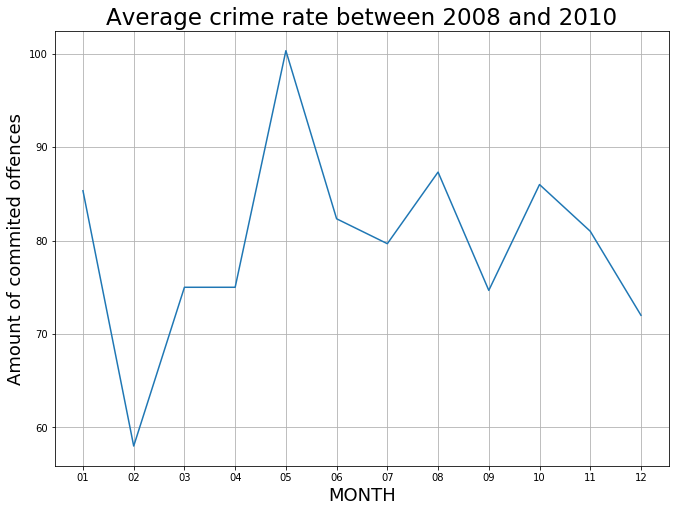

In [6]:
# plotting average crime rate before earthquake

plt.figure(figsize=(11,8))
plt.plot(monthly_offenses_df["mean_2008-2010"])
plt.xlabel ("MONTH", fontsize=18)
plt.ylabel ("Amount of commited offences", fontsize=18)
plt.title ("Average crime rate between 2008 and 2010",  fontsize=23)
plt.grid()
plt.savefig ("../data/cleaned_data/louisa_ave_crime_2008_2010.png")


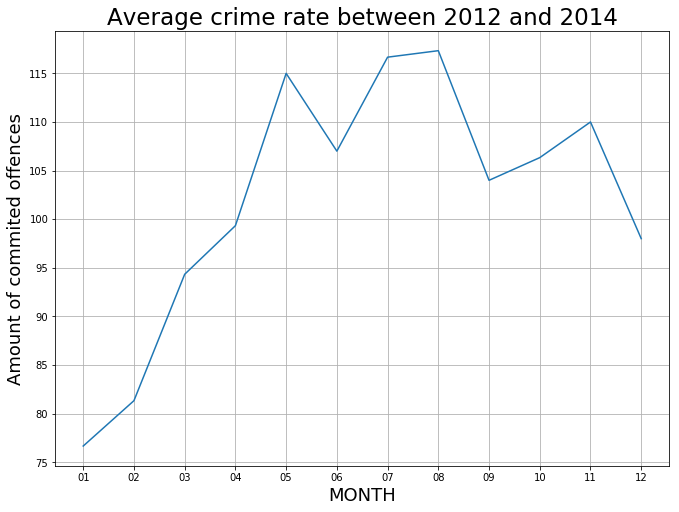

In [7]:
# plotting average crime rate after earthquake

plt.figure(figsize=(11,8))
plt.plot(monthly_offenses_df["mean_2012-2014"])
plt.xlabel ("MONTH", fontsize=18)
plt.ylabel ("Amount of commited offences", fontsize=18)
plt.title ("Average crime rate between 2012 and 2014",  fontsize=23)
plt.grid()
plt.savefig ("../data/cleaned_data/louisa_ave_crime_2012_2014.png")




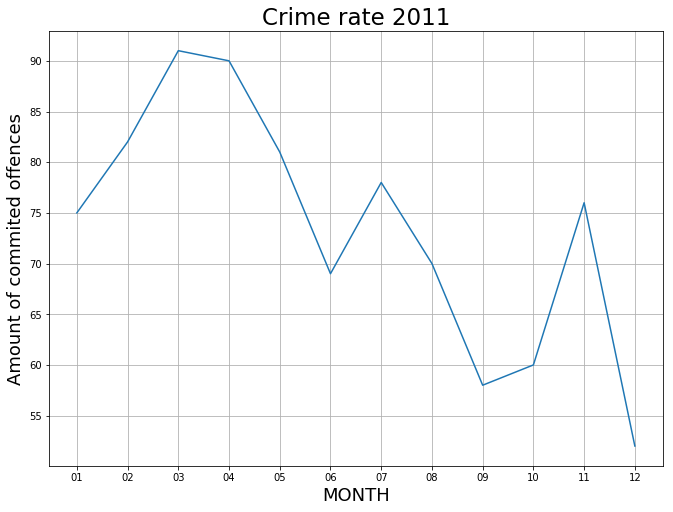

In [8]:
# plotting crime rate during earthquake - 23 august 2011


plt.figure(figsize=(11,8))
plt.plot(monthly_offenses_df[2011])
plt.xlabel ("MONTH", fontsize=18)
plt.ylabel ("Amount of commited offences", fontsize=18)
plt.title ("Crime rate 2011",  fontsize=23)
plt.grid()
plt.savefig ("../data/cleaned_data/louisa_crime_2011.png")




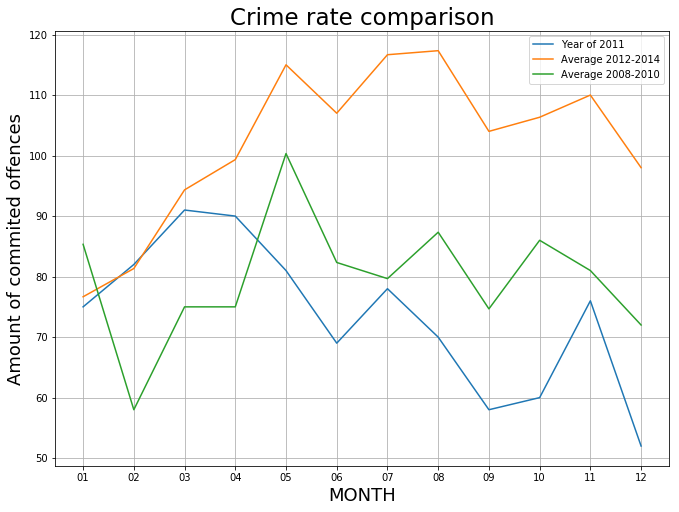

In [9]:
# Extracting data we need for final comparicing plot and creating graph
import warnings
warnings.filterwarnings('ignore')

final_plot_data = monthly_offenses_df[[2011,"mean_2012-2014", "mean_2008-2010" ]]
final_plot_data.rename(columns={2011:"Year of 2011", "mean_2012-2014":"Average 2012-2014", "mean_2008-2010":"Average 2008-2010"}, inplace=True)


plt.figure(figsize=(11,8))
plt.plot(final_plot_data)
plt.xlabel ("MONTH", fontsize=18)
plt.ylabel ("Amount of commited offences", fontsize=18)
plt.title ("Crime rate comparison",  fontsize=23)
plt.grid()
plt.legend(final_plot_data)
plt.savefig ("../data/cleaned_data/louisa_crime_comparison.png")


